In [107]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_2a57edb43d434b9489ee5c83cf1c99a6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Qj_cY5IQ2Brth-OWM1aSTfu_ddAO6eUm94fDeJhhLahy',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_2a57edb43d434b9489ee5c83cf1c99a6.get_object(Bucket='applieddatasciencecourseracapston-donotdelete-pr-8s2tfozs7ojykx',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
# Import all the libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [9]:
# train_df = pd.read_csv('train.csv')
# test_df = pd.read_csv('test.csv')

In [11]:
train_df = df_data_1

In [12]:
train_df.describe(include=np.object)

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [13]:
train_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [14]:
train_df.shape

(54808, 14)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28887e3f60>,
      dtype=object)

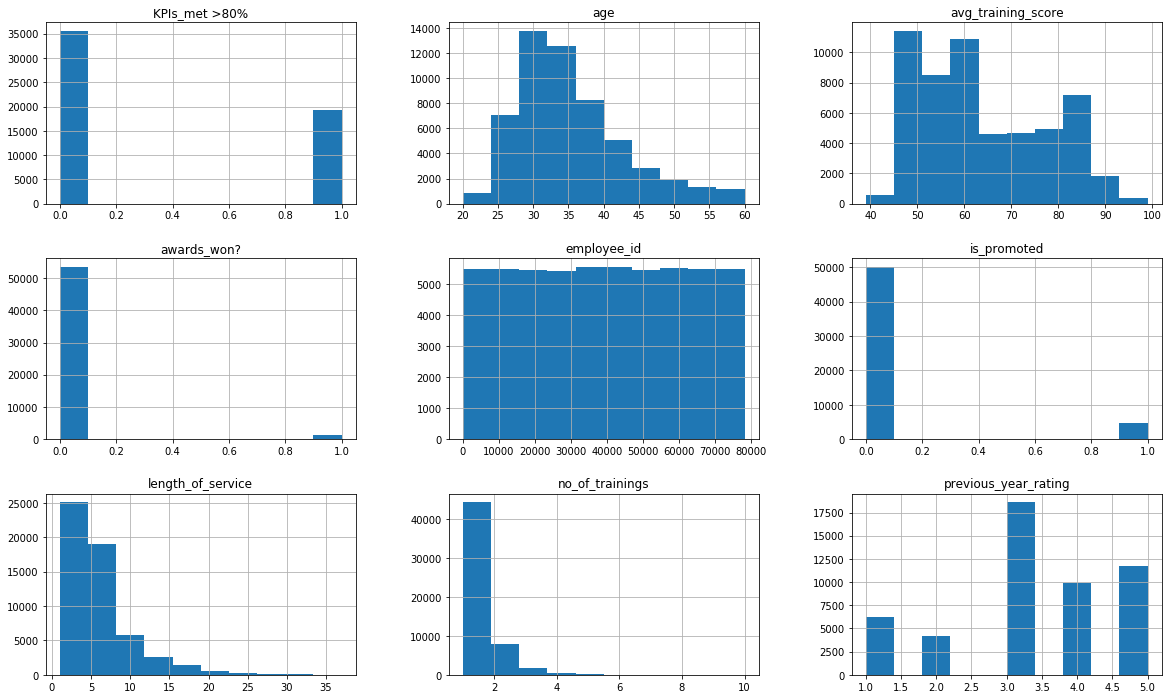

In [15]:
fig,ax = plt.subplots(figsize=(20,12))
train_df.hist(ax = ax)

In [16]:
train_df['previous_year_rating'].fillna(train_df['previous_year_rating'].mean(),inplace = True)  ## for ratings which are missed
train_df['education'].replace(np.nan,"Bachelor's",inplace = True)
# or
# mean=df['bathrooms'].mean()
# df['bathrooms'].replace(np.nan,mean, inplace=True)

In [17]:
train_df.describe(include=np.object)
#train_df.describe()

,department,region,education,gender,recruitment_channel
count,54808,54808,54808,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,39078,38496,30446


In [18]:
train_df.corr()['is_promoted']

employee_id             0.001206
no_of_trainings        -0.024896
age                    -0.017166
previous_year_rating    0.153406
length_of_service      -0.010670
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
is_promoted             1.000000
Name: is_promoted, dtype: float64

In [19]:
train_df.set_index('employee_id',inplace=True)

In [20]:
train_df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [21]:
feature_df = train_df.drop('is_promoted',axis=1)
target_df = train_df['is_promoted']

In [22]:
feature_df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


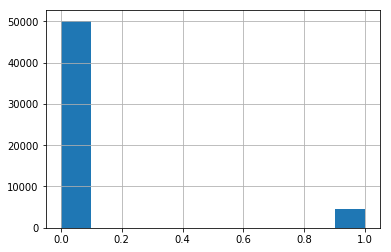

In [23]:
target_df.hist()

In [27]:
cat_cols = ['department','region','education','gender','recruitment_channel']
train_df_cat = pd.get_dummies(train_df[cat_cols])
num_cols = ['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']

In [28]:
train_df_cat.head()

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65438,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
65141,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
7513,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2542,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
48945,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


In [29]:
train_df.shape

(54808, 13)

In [30]:
train_df_onehot = pd.concat([train_df[num_cols],train_df_cat],axis=1)

In [31]:
train_df_onehot.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65438,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
65141,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
7513,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2542,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
48945,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
X = train_df_onehot
y = target_df
lin_reg = LogisticRegression()
lin_reg.fit(X,y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
lin_reg.coef_

array([[-0.1613828 , -0.03235118,  0.25142592,  0.02992846,  1.76385122,
         1.46261103,  0.27769926, -5.82709173,  0.57430917,  3.14849651,
         0.31763633,  0.74880311, -1.81739457, -6.23814158,  3.59789778,
        -4.21924497, -0.21664231, -0.13558399, -0.56569584, -0.59850253,
        -0.17542734, -0.22907337, -0.16595038, -0.34156192,  0.3257955 ,
        -0.01466483, -0.29894602, -0.09308842, -0.60082717, -0.58699077,
         0.20029007,  0.19752073, -0.54911693,  0.30372057, -0.3527239 ,
        -0.14093816,  0.1115587 , -0.7484115 ,  0.03307078, -0.08347767,
        -0.46586172, -0.72176162, -0.51514511, -0.94339033,  0.43417984,
        -0.60644704, -0.69266648,  0.14999008, -0.43117362, -1.19678722,
        -3.27229622, -3.3696127 , -3.07282103, -4.87231465, -4.84241529,
        -3.19098976, -3.32651585, -3.19722434]])

In [35]:
y_pred = lin_reg.predict(X)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print(accuracy_score(y,y_pred))

0.931980732739746


# Pipeline

In [161]:
import numpy as np
import pandas as pd
from time import time
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as pl
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

import seaborn as sns
%matplotlib inline

In [109]:
train_df = df_data_1.copy()
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Exploration of Data

In [110]:
n_records = train_df.shape[0]

# Getting details of num of employees promoted and not promoted
n_promoted = train_df['is_promoted'].value_counts()[1]
n_not_promoted = train_df['is_promoted'].value_counts()[0]

# % of employees got promoted
promoted_percent = (n_promoted/n_records) * 100

# Prints results
print("Num of employee  records  :", n_records)
print("Num of employees promoted :",n_promoted)
print("Num of employees not promoted :",n_not_promoted)
print("% of employees got promoted :",promoted_percent)


Num of employee  records  : 54808
Num of employees promoted : 4668
Num of employees not promoted : 50140
% of employees got promoted : 8.517004816815064


## Feature set Exploration

In [111]:
# train_df.describe(include=np.object)
# train_df.describe()
# train_df['department'].unique()
# train_df['region'].unique()
# train_df['education'].unique()
# train_df['recruitment_channel'].unique()

* **no_of_trainings :** continuous (1-10)
* **age :** continuous - range(20 - 60)
* **previous year rating :** continuous (1-5)
* **length_of_service :** continuous(1-37) - years of servicing (experience in the current company)
* **KPIs_met >80%  :** continuous(0 0r 1) - simply like if KPI > 80 considered as 'yes - 1'
* **awards_won? :** continuous (0 - 1)
* **avg_training_score :** continuous (39 - 99)

* **department :** Categorical - 9- categories- Sales & marketing(max_freq)
       'Sales & Marketing', 'Operations', 'Technology', 'Analytics','R&D', 'Procurement', 'Finance', 'HR', 'Legal'
* **region :**  categorical - 34 - regions - region_2(max_freq)
        'region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'
* **education :** Categorical - 3 levels with Bachelors(max frequency)
        "Master's & above", "Bachelor's", 'Below Secondary'
* **gender :** Categorical - 2 types 
        Male and Female
* **recruitment_channel :** Categorical - 3 levels
        'sourcing', 'other', 'referred'


## Preprocessing 

It is always good to preprocess the data before feeding the input to the ML algorithm. It should be `cleaned,formatted and restructured.`
Fill if any missing values or null values if we observe the dataset using describe('all')some values are missing two columns 
1) previous_year_rating(will replace with mean rating or median which ever suitable) and 
2) education with the one with max_freq
3) Deleting the columns with rating 0.0 as the employees would have joined recently.

In [112]:
train_df['previous_year_rating'].fillna(3.0,inplace = True)  ## for ratings which are missed as median 3.0 is most suitable
train_df['education'].replace(np.nan,"Bachelor's",inplace = True)
train_df.drop(train_df[train_df['previous_year_rating']==0].index,axis = 0,inplace=True)

In [113]:
# # train_df['is_promoted'].value_counts()[1]
# train_df[train_df['previous_year_rating']==0].shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2888865588>,
      dtype=object)

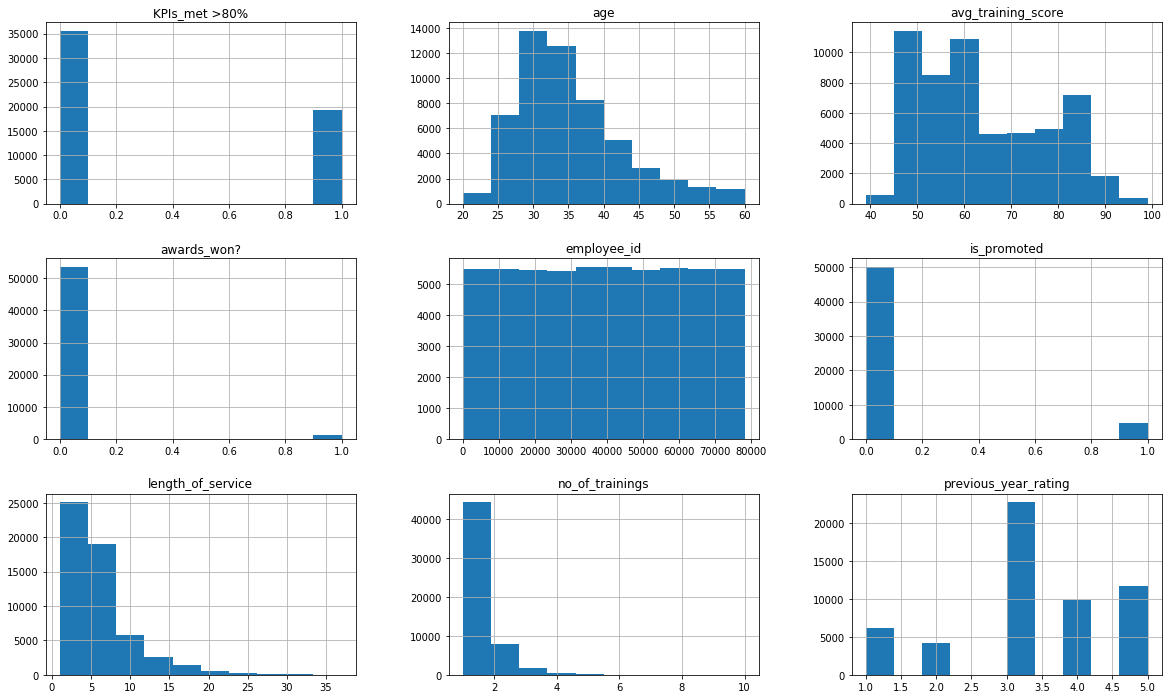

In [114]:
# for observing skewness  in continuous we will plot hist for all the available data
# Also if we observe the describe() method they is not much skewness(lot of diff b/w max and min values) observed in the data
# Data is not effected with skewness
fig,ax = plt.subplots(figsize=(20,12))
train_df.hist(ax = ax)

## Normalisation

Normalising Numerical features:
It is often good practice to perform some type of scaling on numerical features. Applying a **`scaling to the data does not change the shape of each feature's distribution`** however, normalization ensures that **`each feature is treated equally when applying supervised learners`**. Note that once scaling is applied, observing the data in its `raw form will no longer have the same original meaning`.

In [123]:
scaler = MinMaxScaler() # default range(0-1)
num_cols = ['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']

features_minmax_transform = train_df.drop(columns =['is_promoted'])
features_minmax_transform[num_cols] = scaler.fit_transform(train_df[num_cols])

In [140]:
promoted = train_df['is_promoted']

In [124]:
features_minmax_transform.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667
1,65141,Operations,region_22,Bachelor's,m,other,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,0.000000,0.350,0.5,0.166667,0.0,0.0,0.183333
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,0.111111,0.475,0.0,0.250000,0.0,0.0,0.183333
4,48945,Technology,region_26,Bachelor's,m,other,0.000000,0.625,0.5,0.027778,0.0,0.0,0.566667


In [126]:
features_onehot_encode = pd.get_dummies(features_minmax_transform)

In [134]:
# features_onehot_encode.columns
features_onehot_encode.columns.shape[0]

59

In [138]:
features_onehot_encode.set_index('employee_id',inplace=True)

In [139]:
features_onehot_encode.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65438,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
65141,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
7513,0.000000,0.350,0.5,0.166667,0.0,0.0,0.183333,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2542,0.111111,0.475,0.0,0.250000,0.0,0.0,0.183333,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
48945,0.000000,0.625,0.5,0.027778,0.0,0.0,0.566667,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


##### Preprocessing Test Data

In [176]:

body = client_2a57edb43d434b9489ee5c83cf1c99a6.get_object(Bucket='applieddatasciencecourseracapston-donotdelete-pr-8s2tfozs7ojykx',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
#df_data_2.head()



In [181]:
test_df = df_data_2.copy()
test_df['previous_year_rating'].fillna(3.0,inplace = True)  ## for ratings which are missed as median 3.0 is most suitable
test_df['education'].replace(np.nan,"Bachelor's",inplace = True)
test_df.drop(test_df[test_df['previous_year_rating']==0].index,axis = 0,inplace=True)

scaler = MinMaxScaler() # default range(0-1)
num_cols = ['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']

features_minmax_test_transform = test_df
features_minmax_test_transform[num_cols] = scaler.fit_transform(test_df[num_cols])



features_onehot_test_encode = pd.get_dummies(features_minmax_test_transform)
features_onehot_test_encode.set_index('employee_id',inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [183]:
# features_onehot_test_encode.head()

## Evaluating Model performance

In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a `naive predictor.`

Update as per our req

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Naive Predictor Performace

* If we chose a model that always predicted an individual is promoted, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that `always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN)` as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [141]:
'''
TP = np.sum(promoted) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = promoted.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
accuracy = np.sum(promoted)/(np.sum(promoted)+promoted.count())
recall = 1
precision = np.sum(promoted)/(np.sum(promoted)+promoted.count())

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+ 0.5**2)* (precision * recall)/(((0.5**2) * precision) + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))


Naive Predictor: [Accuracy score: 0.0785, F-score: 0.0962]


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [142]:
from sklearn.model_selection import train_test_split

Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_onehot_encode, 
                                                    promoted, 
                                                    test_size = 0.2, 
                                                    random_state = 0)



# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 43846 samples.
Testing set has 10962 samples.


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

###  Creating a Training and Predicting Pipeline

To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

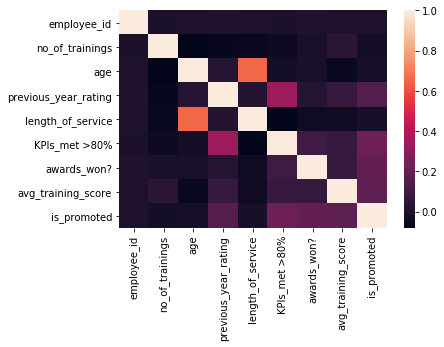

In [144]:
sns.heatmap(train_df.corr())

In [162]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # training time
    results['train_time'] = end - start
        
    #Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:3000])
    end = time() # Get end time
    
    #Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:3000],predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:3000],predictions_train,beta = 0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta = 0.5)
       
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    return results

In [163]:
def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 4, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Set additional plots invisibles
    ax[0, 3].set_visible(False)
    ax[1, 3].axis('off')

    # Create legend
    for i, learner in enumerate(results.keys()):
        pl.bar(0, 0, color=colors[i], label=learner)
    pl.legend()
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()
    

In [164]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the three models
clf_A = SGDClassifier()
clf_B = RandomForestClassifier() # SVC
clf_C = GaussianNB()

# number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = (int)(10*(samples_100)/100)
samples_1 = (int)(1*(samples_100)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

SGDClassifier trained on 438 samples.
SGDClassifier trained on 4384 samples.
SGDClassifier trained on 43846 samples.
RandomForestClassifier trained on 438 samples.
RandomForestClassifier trained on 4384 samples.
RandomForestClassifier trained on 43846 samples.
GaussianNB trained on 438 samples.
GaussianNB trained on 4384 samples.
GaussianNB trained on 43846 samples.


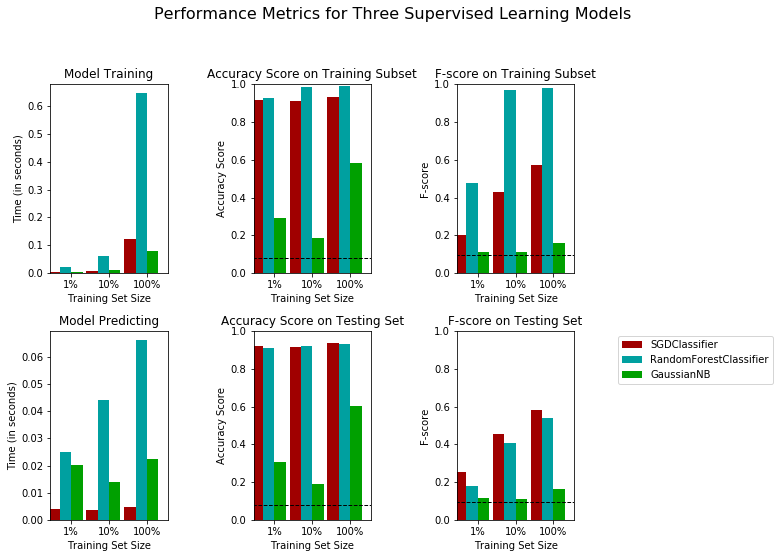

In [165]:
evaluate(results,accuracy,fscore)

## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

###  Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

###### SGD is the best classifier among the available algorithms ----------------------

## MODEL Tuning


Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [172]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import warnings
import sklearn

clf = SGDClassifier(early_stopping=True,validation_fraction=0.2,max_iter = np.ceil(10**6 / len(X_train)))

alpha = 10.0**-np.arange(1,7) # array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])
parameters = {'alpha':alpha}

scorer = make_scorer(fbeta_score,beta = 0.5)

grid_obj = GridSearchCV(clf,parameters,scoring = scorer)

grid_fit = grid_obj.fit(X_train,y_train)

best_clf = grid_fit.best_estimator_
print(best_clf)

# before optimisation
predictions = (clf.fit(X_train, y_train)).predict(X_test)
# After optimisation using Gridsearch CV
best_predictions = best_clf.predict(X_test)


print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-pack

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters

SGDClassifier(alpha=1e-05, average=False, class_weight=None,
       early_stopping=True, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=23.0,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.2, verbose=0, warm_start=False)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.9266
F-score on testing data: 0.4188

Optimized Model
------
Final accuracy score on the testing data: 0.9279
Final F-score on the testing data: 0.5444


In [187]:
X_train_ = features_onehot_encode
y_train_ = promoted
X_test_ = features_onehot_test_encode


# Classifier
# which is the best classifier as observed from above inputs
clf = SGDClassifier(alpha=1e-05, average=False, class_weight=None,
       early_stopping=True, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=23.0,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.2, verbose=0, warm_start=False)

clf.fit(X_train_,y_train_)
y_pred_ = clf.predict(X_test_)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [188]:
y_pred_.shape[0]

23490

In [191]:
y_pred_df = pd.DataFrame(data = y_pred_,columns=['is_promoted'])

In [189]:
X_test_.shape[0]

23490

In [192]:
y_pred_df.head()

,is_promoted
0,0
1,0
2,0
3,0
4,0


In [195]:
y_pred_df.set_index(X_test_.index,inplace=True)

In [198]:
y_pred_df['is_promoted'].value_counts()

0    23000
1      490
Name: is_promoted, dtype: int64

In [199]:
y_pred_df.reset_index(inplace=True)

In [200]:
y_pred_df.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [202]:
y_pred_df.to_csv('submission.csv',index=False)

In [203]:
df = pd.read_csv('submission.csv')

In [205]:
df.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [209]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), columns)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


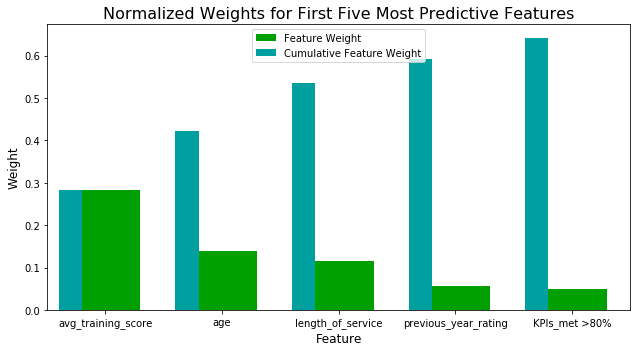

In [212]:
from sklearn.ensemble import RandomForestClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier()
model.fit(X_train,y_train)
# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)

In [208]:
importances

array([2.53996314e-02, 1.36089909e-01, 6.17578694e-02, 1.12548563e-01,
       4.63217661e-02, 2.94831919e-02, 2.79228700e-01, 1.20916155e-02,
       6.79224565e-03, 5.06735339e-03, 2.77038864e-03, 1.92605349e-02,
       1.07733808e-02, 5.63311457e-03, 2.46086955e-02, 8.37253267e-03,
       2.80681479e-03, 2.24358279e-03, 2.92027277e-03, 1.68112906e-03,
       6.47157975e-03, 3.12870801e-03, 6.66776494e-03, 4.39799494e-03,
       4.01974724e-03, 1.19939763e-04, 2.62417778e-03, 1.30263419e-02,
       2.72199296e-03, 1.73265274e-03, 9.28925363e-03, 5.20142244e-03,
       1.77326228e-03, 3.96264553e-03, 5.18727031e-03, 4.97293782e-03,
       3.96642961e-03, 2.72822718e-03, 2.17210924e-03, 3.19177014e-03,
       3.74006856e-03, 2.14206999e-03, 8.08521538e-04, 6.02499487e-04,
       6.88226852e-03, 2.05781159e-03, 1.89845553e-03, 9.40903210e-03,
       2.63978366e-03, 8.58761330e-04, 1.07659914e-02, 1.46549366e-03,
       9.89237483e-03, 1.35392370e-02, 1.25316877e-02, 1.71216052e-02,
      